## LV2-3.

게임 맵 최단 거리

https://school.programmers.co.kr/learn/courses/30/lessons/1844


**문제 설명**

    ROR 게임은 두 팀으로 나누어서 진행하며, 상대 팀 진영을 먼저 파괴하면 이기는 게임입니다. 따라서, 각 팀은 상대 팀 진영에 최대한 빨리 도착하는 것이 유리합니다.

    지금부터 당신은 한 팀의 팀원이 되어 게임을 진행하려고 합니다. 다음은 5 x 5 크기의 맵에, 당신의 캐릭터가 (행: 1, 열: 1) 위치에 있고, 상대 팀 진영은 (행: 5, 열: 5) 위치에 있는 경우의 예시입니다.
    
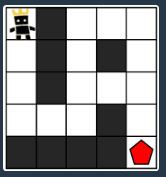

    위 그림에서 검은색 부분은 벽으로 막혀있어 갈 수 없는 길이며, 흰색 부분은 갈 수 있는 길입니다. 캐릭터가 움직일 때는 동, 서, 남, 북 방향으로 한 칸씩 이동하며, 게임 맵을 벗어난 길은 갈 수 없습니다.
    아래 예시는 캐릭터가 상대 팀 진영으로 가는 두 가지 방법을 나타내고 있습니다.

    첫 번째 방법은 11개의 칸을 지나서 상대 팀 진영에 도착했습니다.
    
    
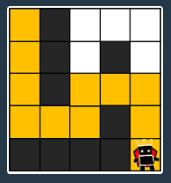

    두 번째 방법은 15개의 칸을 지나서 상대팀 진영에 도착했습니다.
    
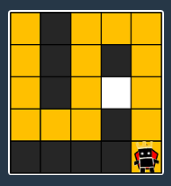

    위 예시에서는 첫 번째 방법보다 더 빠르게 상대팀 진영에 도착하는 방법은 없으므로, 이 방법이 상대 팀 진영으로 가는 가장 빠른 방법입니다.

    만약, 상대 팀이 자신의 팀 진영 주위에 벽을 세워두었다면 상대 팀 진영에 도착하지 못할 수도 있습니다. 예를 들어, 다음과 같은 경우에 당신의 캐릭터는 상대 팀 진영에 도착할 수 없습니다.
    
    
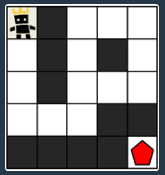


    게임 맵의 상태 maps가 매개변수로 주어질 때, 캐릭터가 상대 팀 진영에 도착하기 위해서 지나가야 하는 칸의 개수의 최솟값을 return 하도록 solution 함수를 완성해주세요. 단, 상대 팀 진영에 도착할 수 없을 때는 -1을 return 해주세요.
    
**제한 사항**

    - maps는 n x m 크기의 게임 맵의 상태가 들어있는 2차원 배열로, n과 m은 각각 1 이상 100 이하의 자연수입니다.
    - n과 m은 서로 같을 수도, 다를 수도 있지만, n과 m이 모두 1인 경우는 입력으로 주어지지 않습니다.
    - maps는 0과 1로만 이루어져 있으며, 0은 벽이 있는 자리, 1은 벽이 없는 자리를 나타냅니다.
    - 처음에 캐릭터는 게임 맵의 좌측 상단인 (1, 1) 위치에 있으며, 상대방 진영은 게임 맵의 우측 하단인 (n, m) 위치에 있습니다.
    
    
**입출력 예 설명**

    입출력 예 #1
    주어진 데이터는 다음과 같습니다.

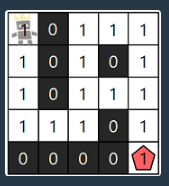


    캐릭터가 적 팀의 진영까지 이동하는 가장 빠른 길은 다음 그림과 같습니다.
    
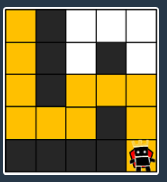

    따라서 총 11칸을 캐릭터가 지나갔으므로 11을 return 하면 됩니다.

    입출력 예 #2
    문제의 예시와 같으며, 상대 팀 진영에 도달할 방법이 없습니다. 따라서 -1을 return 합니다.

**`BFS(Breadth First Search)`**

- list.pop() : 시간복잡도 O(N)
- collections의 deque를 사용해 시간 절약하기

{1: {3, 4}, 2: {3, 4, 5}, 3: {1, 5}, 4: {1}, 5: {2, 6}, 6: {3, 5}}

In [37]:
from collections import deque

q = deque([1,2,3,4])
print(q.popleft())
print(q.popleft())

1
2


In [35]:
from collections import deque

graph_list = {1:set([3,4]),
             2:set([3,4,5]),
             3:set([1,5]),
             4:set([1]),
             5:set([2,6]),
             6:set([3,5])}

graph_list

visited = []
queue = deque([4])

while queue:
    print(f" 시작 queue -> {queue}")
    n = queue.popleft()
    print(f"queue에서 pop한 n-> {n}")
    print(f"queue에서 pop한 후 queue -> {queue}")
    
    if n not in visited:
        visited.append(n)
        print(f" visited -> {visited}, graph_list[n] -> {graph_list[n]}, set(visited)-> {set(visited)}")
        queue += graph_list[n] - set(visited)
        print(f" queue -> {queue}")
        print('------------------')
        
print(visited)

 시작 queue -> deque([4])
queue에서 pop한 n-> 4
queue에서 pop한 후 queue -> deque([])
 visited -> [4], graph_list[n] -> {1}, set(visited)-> {4}
 queue -> deque([1])
------------------
 시작 queue -> deque([1])
queue에서 pop한 n-> 1
queue에서 pop한 후 queue -> deque([])
 visited -> [4, 1], graph_list[n] -> {3, 4}, set(visited)-> {1, 4}
 queue -> deque([3])
------------------
 시작 queue -> deque([3])
queue에서 pop한 n-> 3
queue에서 pop한 후 queue -> deque([])
 visited -> [4, 1, 3], graph_list[n] -> {1, 5}, set(visited)-> {1, 3, 4}
 queue -> deque([5])
------------------
 시작 queue -> deque([5])
queue에서 pop한 n-> 5
queue에서 pop한 후 queue -> deque([])
 visited -> [4, 1, 3, 5], graph_list[n] -> {2, 6}, set(visited)-> {1, 3, 4, 5}
 queue -> deque([2, 6])
------------------
 시작 queue -> deque([2, 6])
queue에서 pop한 n-> 2
queue에서 pop한 후 queue -> deque([6])
 visited -> [4, 1, 3, 5, 2], graph_list[n] -> {3, 4, 5}, set(visited)-> {1, 2, 3, 4, 5}
 queue -> deque([6])
------------------
 시작 queue -> deque([6])
queue에서 pop한 n-> 6


**`DFS(Depth First Search)`**

-깊이 우선 탐색


In [23]:
visited = []
stack = [3]

while stack:
    n = stack.pop()
    print(f"stack에서 pop한 n -> {n}")
    if n not in visited:
        visited.append(n)
        print(f"visited -> {visited}")
        print(f" 넣기전 stack -> {stack} graph_list[n] -> {graph_list[n]}, set(visited) -> {set(visited)}")
        stack += graph_list[n]-set(visited)
        print(f" stack -> {stack}")
        print("--------------------------")
        
print(f" visited -> {visited}")

stack에서 pop한 n -> 3
visited -> [3]
 넣기전 stack -> [] graph_list[n] -> {1, 5}, set(visited) -> {3}
 stack -> [1, 5]
--------------------------
stack에서 pop한 n -> 5
visited -> [3, 5]
 넣기전 stack -> [1] graph_list[n] -> {2, 6}, set(visited) -> {3, 5}
 stack -> [1, 2, 6]
--------------------------
stack에서 pop한 n -> 6
visited -> [3, 5, 6]
 넣기전 stack -> [1, 2] graph_list[n] -> {3, 5}, set(visited) -> {3, 5, 6}
 stack -> [1, 2]
--------------------------
stack에서 pop한 n -> 2
visited -> [3, 5, 6, 2]
 넣기전 stack -> [1] graph_list[n] -> {3, 4, 5}, set(visited) -> {2, 3, 5, 6}
 stack -> [1, 4]
--------------------------
stack에서 pop한 n -> 4
visited -> [3, 5, 6, 2, 4]
 넣기전 stack -> [1] graph_list[n] -> {1}, set(visited) -> {2, 3, 4, 5, 6}
 stack -> [1, 1]
--------------------------
stack에서 pop한 n -> 1
visited -> [3, 5, 6, 2, 4, 1]
 넣기전 stack -> [1] graph_list[n] -> {3, 4}, set(visited) -> {1, 2, 3, 4, 5, 6}
 stack -> [1]
--------------------------
stack에서 pop한 n -> 1
 visited -> [3, 5, 6, 2, 4, 1]


#### 백준 DFS, BFS 문제(basic)

https://www.acmicpc.net/problem/1260

**문제** 

    그래프를 DFS로 탐색한 결과와 BFS로 탐색한 결과를 출력하는 프로그램을 작성하시오. 단, 방문할 수 있는 정점이 여러 개인 경우에는 정점 번호가 작은 것을 먼저 방문하고, 더 이상 방문할 수 있는 점이 없는 경우 종료한다. 정점 번호는 1번부터 N번까지이다.
    
**입력**

    첫째 줄에 정점의 개수 N(1 ≤ N ≤ 1,000), 간선의 개수 M(1 ≤ M ≤ 10,000), 탐색을 시작할 정점의 번호 V가 주어진다. 다음 M개의 줄에는 간선이 연결하는 두 정점의 번호가 주어진다. 어떤 두 정점 사이에 여러 개의 간선이 있을 수 있다. 입력으로 주어지는 간선은 양방향이다.
    
    
**출력**

    첫째 줄에 DFS를 수행한 결과를, 그 다음 줄에는 BFS를 수행한 결과를 출력한다. V부터 방문된 점을 순서대로 출력하면 된다.
    
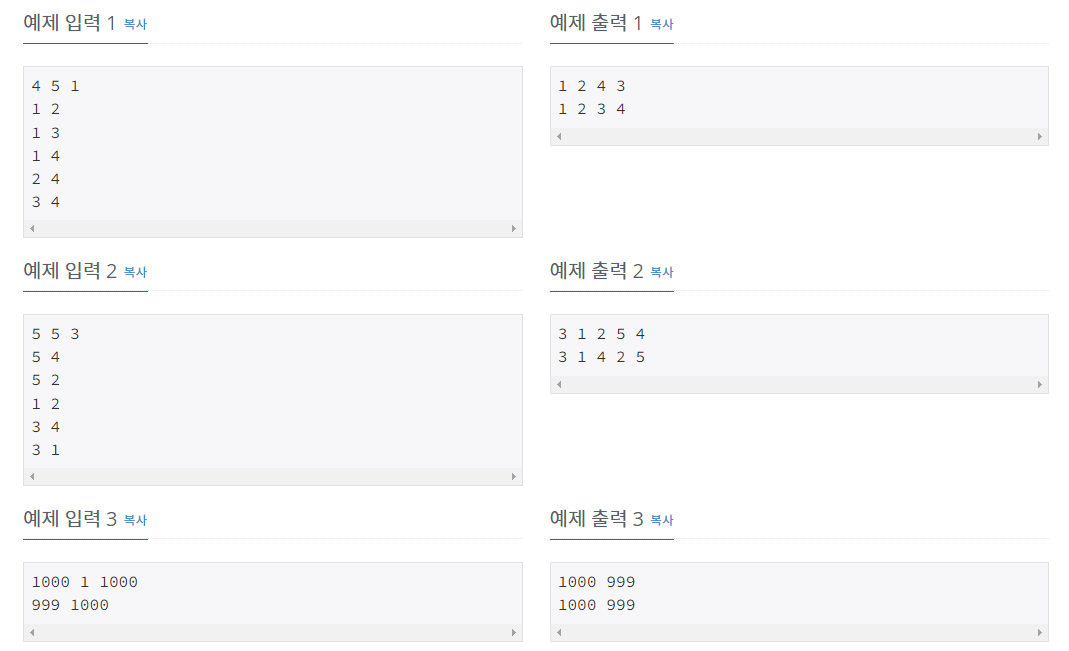

In [40]:
from collections import deque

def DFS(graph, root):
    stack = [root]
    visit = []
       
    while stack:
        n = stack.pop()
        if n not in visit:
            visit.append(n)
            if n in graphe:
                tmp = list(set(graph[n]) - set(visit))
                tmp.sort()
                stack += tmp
    
    return ''.join(str(i) for i in visited)

def BFS(graph, root):
    queue = deque([root])
    visit = []
    
    while queue():
        n = queue.popleft()
        if n not in visit:
            visit.append(n)
            if n in graph:
                tmp = list(set(graph[n]) - set(visit))
                tmp.sort()
                deque += tmp
            
    return ''.join(str(i) for i in visited)   
    


In [51]:
graph = {}

n = input().split(' ')
node, edge, start = [int(i) for i in n]

print(f" node, edge, start -> {node}, {edge}, {start}")

for i in range(edge):
    print(f"edge -> {edge}")
    edge_info = input().split(' ')
    print(f"edge_info -> {edge_info}")
    n1,n2 = [int(j) for j in edge_info]
    print(f"n1, n2 -> {n1}, {n2}")
    
    if n1 not in graph:
        graph[n1] = n2
    elif n2 not in graph[n1]:
        graph[n1].append(n2)
        
    if n2 not in graph:
        graph[n2] = [n1]
    
    elif n1 not in graph[n2]:
        graph[n2].append(n1)

KeyboardInterrupt: Interrupted by user

    - 문제 예시 (트리) DFS)
    
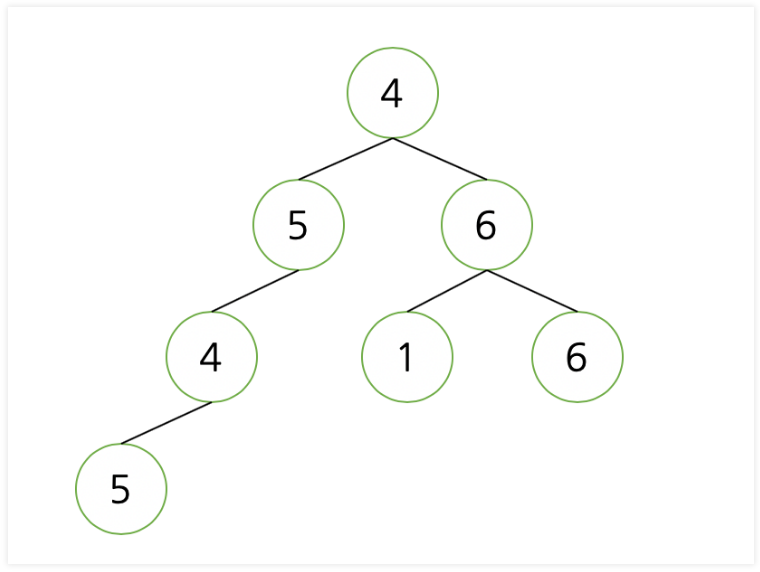

In [52]:
class Tree(object):
    def __init__(self, x, l=None, r=None): # 'None' means empty Node
        self.x = x	# value of Node
        self.l = l	# left child of Node
        self.r = r	# right child of Node

In [53]:
T = Tree(4, Tree(5, Tree(4, Tree(5, None, None), None), None), Tree(6, Tree(1, None, None), Tree(6, None, None)))

     - 루트 노드부터 리프 노드까지의 경로 중 가장 다양한 값을 가진 경로에서 볼 수 있는 값의 갯수를 구하는 것


In [63]:
distinct = {1:set([])}
stack = [(T, [T], set([T.x]))]
i = 1 

while stack:
    n, path, value = stack.pop()
    if n.l == None and n.r==None: # leaf node
        distinct[i] = value
        i = i+1
    else:
        if n.r!= None:
            stack.append((n.r,path + [n.r], value | set([n.r.x])))
        if n.l != None:
            stack.append((n.l, path+ [n.l], value | set([n.l.x])))
answer = 1

for key in distinct.keys():
    tmp = len(distinct[key])
    if tmp > answer:
        answer =tmp
print(distinct)
print(answer)

{1: {4, 5}, 2: {1, 4, 6}, 3: {4, 6}}
3


`DFS 재귀`

In [74]:
graph = [
    [],
    [2,3,8],
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]

# 방문 노드
visited = [False] * len(graph)

def DFS(graph, v, visited):
    visited[v] = True
    print(v, end = ' ')
    
    for i in graph[v]:
        if not visited[i]:
            DFS(graph, i, visited)
            
    
DFS(graph, 1, visited)

1 2 7 6 8 3 4 5 

`BFS 재귀`

In [77]:
from collections import deque

graph = [
    [],
    [2,3,8],
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]

visited = [False] * len(graph)

def BFS(graph, start, vistied):
    queue = deque([start])
    visited[start] = True
    
    while queue:
        v = queue.popleft()
        print(v, end = ' ')
        for i in graph[v]:
            if not visited[i]:
                visited[i] = True
                queue.append(i)
                
BFS(graph, 1, visited)

1 2 3 8 7 4 5 6 

## LV2-4.

다음 큰 숫자

https://school.programmers.co.kr/learn/courses/30/lessons/12911


**문제 설명**

    자연수 n이 주어졌을 때, n의 다음 큰 숫자는 다음과 같이 정의 합니다.

    조건 1. n의 다음 큰 숫자는 n보다 큰 자연수 입니다.
    조건 2. n의 다음 큰 숫자와 n은 2진수로 변환했을 때 1의 갯수가 같습니다.
    조건 3. n의 다음 큰 숫자는 조건 1, 2를 만족하는 수 중 가장 작은 수 입니다.
    예를 들어서 78(1001110)의 다음 큰 숫자는 83(1010011)입니다.

    자연수 n이 매개변수로 주어질 때, n의 다음 큰 숫자를 return 하는 solution 함수를 완성해주세요.
    

**제한 사항**

    n은 1,000,000 이하의 자연수 입니다.
    
**입출력 예**

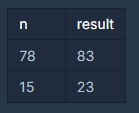

**입출력 예 설명**

    입출력 예#1
    문제 예시와 같습니다.
    입출력 예#2
    15(1111)의 다음 큰 숫자는 23(10111)입니다.


In [88]:
def solution(n):
    n_cnt = format(n, 'b').count('1')
    for num in range(n+1, 1000001):
        if n_cnt == format(num, 'b').count('1'):
            return num

In [87]:
print(solution(78))
print(solution(15))

83
23


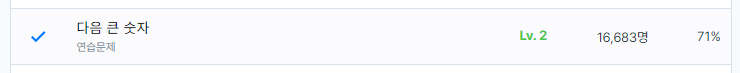

## LV2-5.

기능개발

https://school.programmers.co.kr/learn/courses/30/lessons/42586

**문제 설명**

    프로그래머스 팀에서는 기능 개선 작업을 수행 중입니다. 각 기능은 진도가 100%일 때 서비스에 반영할 수 있습니다.

    또, 각 기능의 개발속도는 모두 다르기 때문에 뒤에 있는 기능이 앞에 있는 기능보다 먼저 개발될 수 있고, 이때 뒤에 있는 기능은 앞에 있는 기능이 배포될 때 함께 배포됩니다.

    먼저 배포되어야 하는 순서대로 작업의 진도가 적힌 정수 배열 progresses와 각 작업의 개발 속도가 적힌 정수 배열 speeds가 주어질 때 각 배포마다 몇 개의 기능이 배포되는지를 return 하도록 solution 함수를 완성하세요.
    
**제한 사항**

    작업의 개수(progresses, speeds배열의 길이)는 100개 이하입니다.
    작업 진도는 100 미만의 자연수입니다.
    작업 속도는 100 이하의 자연수입니다.
    배포는 하루에 한 번만 할 수 있으며, 하루의 끝에 이루어진다고 가정합니다. 예를 들어 진도율이 95%인 작업의 개발 속도가 하루에 4%라면 배포는 2일 뒤에 이루어집니다.
    
**입출력 예**

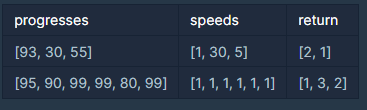

**입출력 예 설명**

    입출력 예 #1
    첫 번째 기능은 93% 완료되어 있고 하루에 1%씩 작업이 가능하므로 7일간 작업 후 배포가 가능합니다.
    두 번째 기능은 30%가 완료되어 있고 하루에 30%씩 작업이 가능하므로 3일간 작업 후 배포가 가능합니다. 하지만 이전 첫 번째 기능이 아직 완성된 상태가 아니기 때문에 첫 번째 기능이 배포되는 7일째 배포됩니다.
    세 번째 기능은 55%가 완료되어 있고 하루에 5%씩 작업이 가능하므로 9일간 작업 후 배포가 가능합니다.

    따라서 7일째에 2개의 기능, 9일째에 1개의 기능이 배포됩니다.

    입출력 예 #2
    모든 기능이 하루에 1%씩 작업이 가능하므로, 작업이 끝나기까지 남은 일수는 각각 5일, 10일, 1일, 1일, 20일, 1일입니다. 어떤 기능이 먼저 완성되었더라도 앞에 있는 모든 기능이 완성되지 않으면 배포가 불가능합니다.

    따라서 5일째에 1개의 기능, 10일째에 3개의 기능, 20일째에 2개의 기능이 배포됩니다.

    ※ 공지 - 2020년 7월 14일 테스트케이스가 추가되었습니다.

In [105]:
def solution(progresses, speeds):
    answer = []
    return answer